Capítulo 4
===================
Básico sobre o NumPy: arrays e processamento vetorizado
-------------------
-------------------


In [1]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [2]:
# Gera alguns dados aleatórios
data = np.random.randn(2, 3)
print(data)

[[ 0.70469007 -0.06664779  0.91062344]
 [-1.12666359 -0.22924642  0.17185316]]


In [3]:
data * 10 # multiplica cada elemento do array por 10

array([[  7.04690072,  -0.66647788,   9.10623444],
       [-11.26663594,  -2.29246419,   1.71853162]])

In [4]:
data + data # soma elemento de coordenadas iguais 

array([[ 1.40938014, -0.13329558,  1.82124689],
       [-2.25332719, -0.45849284,  0.34370632]])

Um ndarray é um contêiner genérico multidimensional para dados
homogêneos; isso significa que todos os elementos devem ser do
mesmo tipo. Todo array tem um *shape* , isto é, uma tupla que indica o
tamanho de cada dimensão, e um *dtype* , que é um objeto que
descreve o tipo de dado do array:

In [5]:
data.shape # 2 linhas e 3 colunas

(2, 3)

In [6]:
data.dtype

dtype('float64')

### Criando ndarrays

In [7]:
data1 = [6,7.5,8,0,1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Sequências aninhadas, como uma lista de listas de mesmo
tamanho, serão convertidas em um array multidimensional:

In [8]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Como *data2* era uma lista de listas, o array NumPy *arr2* tem duas
dimensões, com o formato inferido a partir dos dados. Podemos
confirmar isso inspecionando os atributos *ndim* e *shape* :

In [9]:
arr2.ndim

2

In [10]:
arr2.shape

(2, 4)

In [11]:
arr1.dtype

dtype('float64')

In [12]:
arr2.dtype

dtype('int64')

há uma série de outras funções para criar novos
arrays. Como exemplos, *zeros* e *ones* criam arrays de 0s ou de 1s
respectivamente, com um dado tamanho ou formato. *empty* cria um
array sem inicializar seus valores com qualquer valor em particular.
Para criar um array com dimensões maiores usando esses métodos,
passe uma tupla para o formato:

In [13]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.zeros((3,6)) # Array bidimendional com 3 linhas e 6 colunas

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [15]:
np.empty((2,3,2)) # Array Tridimensional 

array([[[4.64379638e-310, 4.64379756e-310],
        [3.95252517e-323, 4.64379756e-310],
        [3.95252517e-323, 4.64379756e-310]],

       [[4.44659081e-323, 0.00000000e+000],
        [4.64379756e-310, 4.64379756e-310],
        [4.64379756e-310, 0.00000000e+000]]])

*arange* é uma versão da função embutida range de Python com valor
de array:

In [16]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Tipos de dados para ndarrays
O *tipo de dado* ou *dtype* é um objeto especial contendo as informações
(ou metadados, isto é, dados sobre dados) que o ndarray precisa
para interpretar uma porção de memória como um tipo de dado
particular:

In [17]:
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)

arr1.dtype

dtype('float64')

In [18]:
arr2.dtype

dtype('int32')

Os dtypes numéricos recebem o nome da
mesma maneira: um nome de tipo, como *float* ou *int* , seguido de um
número que indica a quantidade de bits por elemento. Um valor
padrão de ponto flutuante com dupla precisão (que é usado
internamente no objeto *float* de Python) ocupa 8 bytes, isto é, 64 bits.
Desse modo, esse tipo é conhecido no NumPy como *float64*.

### Tipos de Dados do NumPy

TIPO         | CÓDIGO DO TIPO | DESCRIÇÃO
-------------|----------------|----------
int8, uint8  | i1, u1         |Tipos inteiros de 8 bits (1 byte) com e sem sinal 
int16, uint16|  i2, u2        |Tipos inteiros de 16 bits com e sem sinal
int32, uint32|  i4, u4        |Tipos inteiros de 32 bits com e sem sinal
int64, uint64|  i8, u8        |Tipos inteiros de 64 bits com e sem sinal
float16      |  f2            |Ponto flutuante com metade da precisão
float32      |f4 ou f|Ponto flutuante padrão com precisão única; compatível
com o float de C
float64| f8 ou d| Ponto flutuante padrão com dupla precisão; compatível
||com o double de C e o objeto float de Python
float128| f16 ou g | Ponto flutuante com precisão estendida
complex64,
complex128,
complex256| c8,c16,c32 |Números complexos representados por dois floats de 32,
||64 ou 128, respectivamente
bool| ? |Tipo booleano que armazena os valores True e False
object| O |Tipo objeto de Python; um valor pode ser qualquer objeto
||Python
string_| S |Tipo string ASCII de tamanho fixo (1 byte por caractere); por exemplo, para criar um dtype string com tamanho 10,
||utilize 'S10'
unicode_| U |Tipo Unicode de tamanho fixo (número de bytes é específico de cada plataforma); a mesma semântica de especificação de string_ (por exemplo, 'U10')

Você pode converter explicitamente ou fazer *cast* de um array de um
dtype para outro usando o método *astype* de ndarray:

In [19]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int64')

In [20]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [21]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [22]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

Se você tiver um array de strings que representem números, poderá
usar *astype* para convertê-lo em um formato numérico:

In [23]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [24]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [25]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Aritmética com arrays NumPy

In [26]:
arr = np.array([[1,2,3],[4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [27]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [28]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

As operações aritméticas com escalares fazem o argumento escalar
ser propagado a cada elemento do array:

In [29]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [30]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

As operações aritméticas com escalares fazem o argumento escalar
ser propagado a cada elemento do array:

In [31]:
arr2 = np.array([[0.,4.,1.],[7.,2.,12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [32]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Indexação básica e fatiamento

In [33]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
arr[5]

5

In [35]:
arr[5:8]

array([5, 6, 7])

In [36]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [37]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

Agora, quando altero valores em *arr_slice* , as mudanças se refletem
no array *arr* original:

In [38]:
arr_slice[1] = 123456
arr

array([     0,      1,      2,      3,      4,     12, 123456,     12,
            8,      9])

A fatia “nua” [:] fará uma atribuição a todos os valores em um array:

In [39]:
arr_slice[:] = 69
arr

array([ 0,  1,  2,  3,  4, 69, 69, 69,  8,  9])

In [40]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d[2]

array([7, 8, 9])

In [41]:
arr2d[0][2]

3

In [42]:
arr2d[0, 2]

3

Em arrays multidimensionais, se você omitir os índices finais, o
objeto devolvido será um ndarray de dimensões menores,
constituído de todos os dados nas dimensões mais altas. Assim, no
array *arr3d* 2 × 2 × 3:

In [43]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [44]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
arr3d[0][0]

array([1, 2, 3])

In [46]:
arr3d[0][0][1]

2

Tanto valores escalares quanto arrays podem ser atribuídos a
*arr3d[0]*:

In [47]:
old_values = arr3d.copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [48]:
arr3d[0] = old_values[0]
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

De modo semelhante, *arr3d[1, 0]* contém todos os valores cujos
índices começam com *(1, 0)* , formando um array unidimensional:

In [49]:
arr3d[1, 0]

array([7, 8, 9])

In [50]:
arr3d[0, 1, 2]

6

Essa expressão é equivalente a uma indexação em dois passos:

In [51]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [52]:
x[0]

array([7, 8, 9])

### Indexando com fatias

In [53]:
arr

array([ 0,  1,  2,  3,  4, 69, 69, 69,  8,  9])

In [54]:
arr[1:6]

array([ 1,  2,  3,  4, 69])

In [55]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [56]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

Como podemos ver, ele foi fatiado ao longo do eixo 0, que é o
primeiro eixo. Uma fatia, portanto, seleciona um intervalo de
elementos ao longo de um eixo. Ler a expressão *arr2d[:2]* como  “selecione as duas primeiras linhas de *arr2d*  ” talvez possa ajudar.
Podemos passar várias fatias, do mesmo modo como podemos
passar vários índices:

In [57]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [58]:
arr2d[1, :2]

array([4, 5])

In [59]:
arr2d[:2, 2]

array([3, 6])

In [60]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [61]:
arr2d[:2, 1:] = 0 # até a linha 1 a partir da coluna 1
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

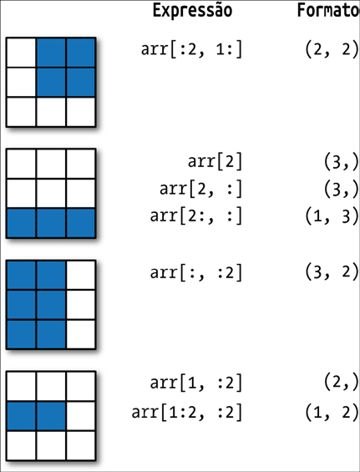


*Fatiamento de Arrays bidimensionais*

### Indexação booleana
Vamos considerar um exemplo em que temos alguns dados em um
array e um array de nomes com duplicatas. Usarei aqui a função
randn de *numpy.random* para gerar alguns dados aleatórios *normalmente
distribuídos*:

In [169]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [170]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [171]:
data

array([[-0.81888787, -0.13630683, -0.99126506,  1.80478136],
       [-0.1048181 ,  0.43570346, -1.88019309, -1.02274899],
       [ 0.74208579, -1.77077189, -0.91971822,  0.85274326],
       [ 0.82471271, -0.25299275, -0.05494247,  0.6692372 ],
       [-0.07488872, -0.96363499, -0.49205483,  1.27117861],
       [ 0.43152212,  1.25556018, -1.21242774, -1.04114603],
       [ 0.19408604, -1.3917118 , -0.15378478,  1.37959935]])

Suponha que cada nome corresponda a uma linha do array data e
que queremos selecionar todas as linhas com o nome
correspondente *'Bob'* . Assim como nas operações aritméticas, as
comparações (como == ) com arrays também são vetorizadas.
Assim, comparar *names* com a string *'Bob'* produzirá um array
booleano:

In [65]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [66]:
data[names == 'Bob']

array([[ 1.30289789, -0.3144474 ,  0.80606175, -0.88840594],
       [ 0.73490583,  0.04428503,  0.41876688,  0.454605  ]])

O array booleano deve ter o mesmo tamanho do eixo do array que
ele está indexando. Você pode até mesmo misturar e fazer a
correspondência entre arrays booleanos e fatias ou inteiros (ou
sequências de inteiros; discutiremos melhor esse assunto depois).

*A seleção booleana não falhará se o array booleano não tiver o tamanho
correto, portanto recomendo tomar cuidado quando utilizar esse recurso.*

Nesses exemplos, faço a seleção a partir das linhas em que *names
== 'Bob'* e indexo as colunas também:

In [172]:
data[names == 'Bob', :2]

array([[-0.81888787, -0.13630683],
       [ 0.82471271, -0.25299275]])

In [173]:
data[names == 'Bob', 3]

array([1.80478136, 0.6692372 ])

In [69]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [70]:
data[~(names == 'Bob')]

array([[-0.47262658,  0.56851025,  2.09681132, -2.01239158],
       [-0.38309037, -0.38078795, -0.34176512, -0.43312551],
       [-1.27123763,  0.66857852,  0.1029035 , -2.54485968],
       [-0.58186859, -0.54330215,  0.48055667,  1.72758494],
       [-0.60617414,  0.23169922, -0.22176191, -1.37213487]])

O operador ~ pode ser útil se quisermos inverter uma condição
genérica:

In [71]:
cond = names == 'Bob'
data[~cond]

array([[-0.47262658,  0.56851025,  2.09681132, -2.01239158],
       [-0.38309037, -0.38078795, -0.34176512, -0.43312551],
       [-1.27123763,  0.66857852,  0.1029035 , -2.54485968],
       [-0.58186859, -0.54330215,  0.48055667,  1.72758494],
       [-0.60617414,  0.23169922, -0.22176191, -1.37213487]])

In [72]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [73]:
data[mask]

array([[ 1.30289789, -0.3144474 ,  0.80606175, -0.88840594],
       [-0.38309037, -0.38078795, -0.34176512, -0.43312551],
       [ 0.73490583,  0.04428503,  0.41876688,  0.454605  ],
       [-1.27123763,  0.66857852,  0.1029035 , -2.54485968]])

Selecionar dados de um array com indexação booleana *sempre*
criará uma cópia dos dados, mesmo que o array devolvido não seja
alterado.

***Atenção*** :
*As palavras reservadas and e or de Python não funcionam com arrays
booleanos. Utilize **&** (and) e **|** (or) em seu lugar.*

In [174]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.        , 1.80478136],
       [0.        , 0.43570346, 0.        , 0.        ],
       [0.74208579, 0.        , 0.        , 0.85274326],
       [0.82471271, 0.        , 0.        , 0.6692372 ],
       [0.        , 0.        , 0.        , 1.27117861],
       [0.43152212, 1.25556018, 0.        , 0.        ],
       [0.19408604, 0.        , 0.        , 1.37959935]])

In [75]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.56851025, 2.09681132, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.48055667, 1.72758494],
       [0.        , 0.23169922, 0.        , 0.        ]])

### Indexação sofisticada
*Indexação sofisticada* (fancy indexing) é o termo adotado pelo **NumPy**
para descrever a indexação usando arrays de inteiros. Suponha que
tivéssemos um array 8 × 4:

In [76]:
arr = np.empty((8, 4))

In [77]:
for i in range(8):
  arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Para selecionar um subconjunto das linhas em uma ordem em
particular, podemos simplesmente passar uma lista ou um ndarray
de inteiros especificando a ordem desejada:

In [78]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Espero que esse código tenha feito o que você esperava! Usar
índices negativos seleciona as linhas a partir do final:

In [79]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passar vários índices de array faz algo um pouco diferente; a instrução seleciona um array unidimensional
correspondentes a cada tupla de índices:

In [177]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [178]:
arr[[1, 5, 7, 2],[0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Nesse caso, os elementos (1, 0) , (5, 3) , (7, 1) e (2, 2) foram
selecionados.

In [179]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposição de arrays e troca de eixos

A transposição é uma forma especial de reformatação que, de modo
semelhante, devolve uma visualização dos dados subjacentes, sem
copiar nada. Os arrays têm o método transpose , além do atributo
especial T :

In [180]:
arr = np.arange(15).reshape(3, 5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [181]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Ao fazer processamentos de matrizes, talvez você realize isto com
muita frequência – por exemplo, quando calcular o produto da matriz
interna usando *np.dot*:

In [184]:
arr = np.random.randn(6, 3)
arr

array([[-0.44644839,  0.39670244, -1.68421562],
       [ 0.12130571, -1.99420753,  0.10674984],
       [ 0.67812743,  0.82502045, -1.85551367],
       [-0.89320206,  0.52293883,  0.39365337],
       [-2.07544883,  0.2290192 ,  0.64792942],
       [ 0.32266168, -1.21391381, -0.18064995]])

In [186]:
# Array Transverso vezes o Array
np.dot(arr.T, arr)

array([[ 5.88329637, -1.19363809, -2.24805516],
       [-1.19363809,  6.61439682, -1.83831214],
       [-2.24805516, -1.83831214,  6.89831867]])

Para arrays de dimensões maiores, *transpose* aceitará uma tupla de
números de eixos para permutá-los (para dar mais um nó na
cabeça):

In [191]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [192]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Nesse caso, os eixos foram reordenados com o segundo eixo em
primeiro lugar, o primeiro eixo em segundo e o último eixo
permaneceu inalterado.

Uma transposição simples com .T é um caso especial de troca de
eixos. O ndarray tem o método *swapaxes* , que aceita um par de
números de eixos e troca os eixos indicados para reorganizar os
dados:

In [193]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [196]:
arr.swapaxes(2, 1)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [194]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

### Funções universais: funções rápidas de arrays para todos os elementos

Uma função universal (universal function), ou *ufunc* , é uma função
que executa operações em todos os elementos nos dados de
ndarrays. Podemos pensar nelas como ***wrappers*** vetorizados
rápidos para funções simples que aceitam um ou mais valores
escalares e geram um ou mais resultados escalares.

Muitas ufuncs são transformações simples em todos os elementos,
como *sqrt* ou *exp* :

In [197]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [198]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [199]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Essas funções são chamadas de ufuncs *unárias* . Outras, como *add* ou
*maximum* , aceitam dois arrays (portanto são ufuncs *binárias* ) e
devolvem um único array como resultado:

In [200]:
x = np.random.randn(8)
y = np.random.randn(8)

In [201]:
x

array([-0.95170959,  1.31335024,  0.17386795,  1.47954038,  0.49056335,
        0.16464261, -0.75664879, -1.37720127])

In [202]:
y

array([ 0.8206984 , -1.31437094, -0.82709133, -1.68278236,  1.22958897,
        0.84140719,  0.6592405 , -0.46433035])

In [203]:
np.maximum(x, y)

array([ 0.8206984 ,  1.31335024,  0.17386795,  1.47954038,  1.22958897,
        0.84140719,  0.6592405 , -0.46433035])

Nesse caso, *numpy.maximum* calculou o máximo entre os elementos
de *x* e de *y* para todos os elementos.

Embora não seja comum, uma ufunc pode devolver vários arrays.
*modf* é um exemplo; ela é uma versão vetorizada da função
embutida *divmod* de Python e devolve as partes fracionária e inteira
de um array de ponto flutuante:

In [204]:
arr = np.random.randn(7) * 5
arr

array([ 3.63922261, -3.40142285, -1.27393798, -7.72983299,  7.50115123,
        3.8455515 ,  8.79176114])

In [205]:
parte_fracinada, parte_inteira = np.modf(arr)
parte_fracinada

array([ 0.63922261, -0.40142285, -0.27393798, -0.72983299,  0.50115123,
        0.8455515 ,  0.79176114])

In [206]:
parte_inteira

array([ 3., -3., -1., -7.,  7.,  3.,  8.])

In [207]:
arr

array([ 3.63922261, -3.40142285, -1.27393798, -7.72983299,  7.50115123,
        3.8455515 ,  8.79176114])

In [208]:
np.sqrt(arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.90767466,        nan,        nan,        nan, 2.73882296,
       1.96100778, 2.96509041])

In [209]:
np.sqrt(arr, arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([1.90767466,        nan,        nan,        nan, 2.73882296,
       1.96100778, 2.96509041])

In [210]:
arr

array([1.90767466,        nan,        nan,        nan, 2.73882296,
       1.96100778, 2.96509041])

 ### Tabela de Ufuncs unárias

 Função  | Descrição 
---------|-----------
 abs, fabs | Calcula o valor absoluto de inteiros, números de ponto flutuante e valores complexos para todos os elementos|
qrt | Calcula a raiz quadrada de cada elemento (equivalente a arr ** 0.5)
square |Calcula o quadrado de cada elemento (equivalente a arr ** 2)
exp | Calcula o exponencial ex de cada elemento
log, log10, log2, log1p | Logaritmo natural (base e), log na base 10, log na base2 e log (1 + x), respectivamente
sign | Calcula o sinal de cada elemento: 1 (positivo), 0 (zero) ou –1 (negativo)
ceil | Calcula o teto de cada elemento (isto é, o menor inteiro maior ou igual ao número)
floor | Calcula o piso de cada elemento (isto é, o maior inteiro menor ou igual ao elemento)
rint | Arredonda os elementos para o inteiro mais próximo, preservando o dtype
modf | Devolve as partes fracionária e inteira do array como um array separado
isnan| Devolve um array booleano indicando se cada valor é NaN (Not a Number)
isfinite, isinf| Devolve um array booleano indicando se cada elemento é finito (não inf, não NaN) ou infinito, respectivamente
cos, cosh, sin, sinh, tan, tanh| Funções trigonométricas regulares e hiperbólicas
arccos, arccosh, arcsin, arcsinh, arctan, arctanh| Funções trigonométricas inversas
logical_not| Calcula o valor-verdade de not x para todos os elementos (equivalente a ~arr).

### Tabela de Funções universais binárias

Função | Descrição
-------|-----------
add| Soma elementos correspondentes em arrays
subtract| Subtrai elementos do segundo array do primeiro
multiply| Multiplica elementos do array
divide, floor_divide| Faz a divisão ou a divisão pelo piso (truncando o resto)
power| Eleva os elementos do primeiro array às potências indicadas no segundo array
maximum, fmax| Máximo para todos os elementos; fmax ignora NaN
minimum, fmin| Mínimo para todos os elementos; fmin ignora NaN
mod| Módulo para todos os elementos (resto da divisão)
copysign| Copia o sinal dos valores do segundo argumento para os valores do primeiro argumento
greater, greater_equal, less, less_equal, equal, not_equal | Faz uma comparação para todos os elementos, produzindo um array booleano (equivalente aos operadores infixos >, >=, <, <=, ==, !=)
logical_and, logical_or, logical_xor| Calcula o valor-verdade da operação lógica (equivalente aos operadores infixos &, |, ^) para todos os elementos

### Programação orientada a arrays

Usar arrays NumPy permite expressar vários tipos de tarefas de
processamento de dados na forma de expressões concisas de
arrays que poderiam, do contrário, exigir a escrita de laços. Essa
prática de substituir laços explícitos por expressões de arrays é
comumente chamada de *vetorização* (vectorization). Em geral,
operações vetorizadas em arrays com frequência serão mais
rápidas em uma ou duas (ou mais) ordens de grandeza do que seus
equivalentes em Python puro, com o maior impacto sendo em
qualquer tipo de processamentos numéricos. Mais adiante, no
Apêndice A, explicarei o que é o *broadcasting* : um método eficaz para
processamentos com vetorização.

Como um exemplo simples, suponha que quiséssemos avaliar a
função *sqrt(x^2 + y^2)* para uma grade regular de valores. A função
***np.meshgrid*** aceita dois arrays 1D e gera duas matrizes 2D
correspondentes a todos os pares *(x, y)* nos dois arrays:


In [105]:
points = np.arange(-5, 5, 0.01) # 1000 pontos igualmente espaçados
xs,  ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Avaliar a função é uma questão de escrever a mesma expressão
que você escreveria com dois pontos:

In [106]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

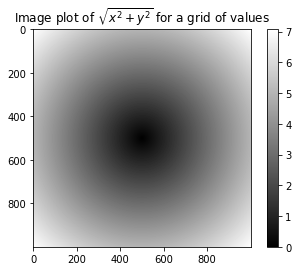

In [211]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')
plt.show()

### Expressando uma lógica condicional como operações de array

A função *numpy.where* é uma versão vetorizada da expressão ternária
*x if condition else y* . Suponha que tivéssemos um array booleano e dois
arrays de valores:

In [212]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suponha que queremos tomar um valor de *xarr* sempre que o valor
correspondente em cond seja *True* e, caso contrário, tomar o valor de
*yarr* . Uma list comprehension que faça isso pode ter o seguinte
aspecto:

In [213]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Esse código apresenta vários problemas. Em primeiro lugar, ele não
será muito rápido para arrays grandes (porque todo o trabalho está
sendo feito em código Python interpretado). Em segundo, ele não
funcionará para arrays multidimensionais. Com *np.where* , podemos
escrever esse código de modo bem conciso:

In [214]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

O segundo e o terceiro argumentos de *np.where* não precisam ser
arrays; um deles, ou ambos, podem ser escalares. Um uso típico de
*where* em análise de dados é aquele em que geramos um novo array
de valores com base em outro array. Suponha que você tivesse uma
matriz de dados gerados aleatoriamente e quisesse substituir todos
os valores positivos por 2 e todos os valores negativos por –2. É
muito fácil fazer isso usando *np.where* :

In [215]:
arr = np.random.randn(4, 4)
arr

array([[ 0.2887166 ,  0.00195605, -0.23770687, -1.57100785],
       [-0.1002092 , -0.98367044, -0.29381748, -0.83397395],
       [-1.41321577, -0.69838142,  0.59840421,  1.68011624],
       [ 0.69650475, -0.10198117,  0.45090849,  1.86338286]])

In [216]:
arr > 0

array([[ True,  True, False, False],
       [False, False, False, False],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [217]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2, -2],
       [-2, -2, -2, -2],
       [-2, -2,  2,  2],
       [ 2, -2,  2,  2]])

Podemos combinar escalares e arrays quando usamos *np.where*. Por
exemplo, posso substituir todos os valores positivos em arr pela
constante 2, assim:

In [218]:
np.where(arr > 0, 2, arr) # define somente os valores positivos com 2

array([[ 2.        ,  2.        , -0.23770687, -1.57100785],
       [-0.1002092 , -0.98367044, -0.29381748, -0.83397395],
       [-1.41321577, -0.69838142,  2.        ,  2.        ],
       [ 2.        , -0.10198117,  2.        ,  2.        ]])

### Métodos matemáticos e estatísticos

Um conjunto de funções matemáticas que calcula estatísticas sobre
um array inteiro ou sobre os dados ao longo de um eixo é acessível
por meio de métodos da classe array. Você pode usar agregações
(com frequência chamadas de *reduções*), como *sum*, *mean* e ***std*** **(desvio-padrão)**, seja chamando o método da instância do array ou
usando a função de nível superior do NumPy.

Neste exemplo, gerarei alguns dados aleatórios normalmente
distribuídos e calcularei algumas estatísticas de agregação:

In [219]:
arr = np.random.randn(5, 4)
arr

array([[-1.43269119, -0.53723816, -1.11187584, -1.55995503],
       [-0.31194753,  0.93331701,  0.07420272,  1.01691006],
       [ 0.50682744,  1.23502338,  0.40897216,  1.80495159],
       [ 0.29652818,  0.82171208, -0.11434935, -0.89679975],
       [ 1.12974034, -0.11680483,  0.12768487, -0.8177108 ]])

In [220]:
arr.mean() # media de todos os elementos do array

0.07282486813626778

In [221]:
np.mean(arr)

0.07282486813626778

In [222]:
arr.sum() # soma de todos os elementos do array

1.4564973627253555

Funções como *mean* e *sum* aceitam um argumento opcional *axis* que
calcula a estatística no eixo dado, resultando em um array com uma
dimensão a menos:

In [223]:
arr.mean(axis=1)

array([-1.16044005,  0.42812056,  0.98894364,  0.02677279,  0.0807274 ])

In [120]:
arr.mean(axis=0)

array([ 0.00116345,  0.12326976,  0.29689485, -0.01777712])

Nesse caso, *arr.mean(1)* significa “calcule a média pelas colunas”,
enquanto *arr.sum(0)* significa “calcule a soma pelas linhas”.

Outros métodos como *cumsum* e *cumprod* não fazem agregações,
gerando um array de resultados intermediários em seu lugar:

In [224]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

Em arrays multidimensionais, funções de acumulação como *cumsum*
devolvem um array de mesmo tamanho, porém com as agregações
parciais calculadas ao longo do eixo indicado, de acordo com cada
fatia de dimensão menor:

In [225]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [226]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [124]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

  ### Métodos estatísticos básicos de arrays

Método | Descrição
-------|-----------
sum | Soma de todos os elementos do array ou ao longo de um eixo; arrays de tamanho zero têm soma igual a 0
mean | Média aritmética; arrays de tamanho zero têm média NaN
std, var | Desvio-padrão e variância, respectivamente, com graus opcionais de ajuste de liberdade (denominador default n)
min, max | Mínimo e máximo
argmin, argmax | Índices dos elementos mínimo e máximo, respectivamente
cumsum| Soma cumulativa dos elementos, começando de 0
cumprod |Produto cumulativo dos elementos, começando de 1


### Métodos para arrays booleanos

Valores booleanos sofrem coerção para 1 (*True*) e 0 (*False*) nos
métodos anteriores. Assim, *sum* com frequência é usado como uma
forma de contar valores *True* em um array booleano:

In [228]:
arr = np.random.randn(100)
(arr > 0).sum() # Números de valores positivos

54

Há dois métodos adicionais, *any* e *all*, particularmente úteis para arrays booleanos. *any* testa se um ou mais valores em um array são
*True*, enquanto *all* verifica se todos os valores são *True*:

In [229]:
bools = np.array([False, False, True, False])
bools.any() # Se tem um ou mais valores True no array

True

In [230]:
bools.all() # Se todos os valores True no array

False

### Ordenação
Assim como o tipo embutido lista de Python, os arrays NumPy
podem ser ordenados in-place com o método *sort*:

In [231]:
arr = np.random.randn(6)
arr

array([-1.94639997, -0.90799018,  0.40003996,  0.93442382,  0.6091473 ,
       -1.07863843])

In [232]:
arr.sort()
arr

array([-1.94639997, -1.07863843, -0.90799018,  0.40003996,  0.6091473 ,
        0.93442382])

In [233]:
arr = np.random.randn(5, 3)
arr

array([[ 1.56274788,  1.02841752,  0.29189765],
       [ 0.83471591, -1.40990607, -0.58350775],
       [ 0.00713338,  0.98508259, -1.18213938],
       [ 0.5516826 ,  0.76053544,  0.19221825],
       [-0.85542199, -0.5692978 ,  0.73244395]])

In [234]:
arr.sort(1)
arr

array([[ 0.29189765,  1.02841752,  1.56274788],
       [-1.40990607, -0.58350775,  0.83471591],
       [-1.18213938,  0.00713338,  0.98508259],
       [ 0.19221825,  0.5516826 ,  0.76053544],
       [-0.85542199, -0.5692978 ,  0.73244395]])

O método de nível superior *np.sort* devolve uma cópia ordenada de
um array, em vez de modificá-lo in-place. Uma forma rápida e fácil
de calcular os quantis de um array é ordená-lo e selecionar o valor
em uma posição em particular:

In [235]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # quantil de 5%

-1.5981719740519928

### Unicidade e outras lógicas de conjuntos

O NumPy tem algumas operações básicas de conjunto para
ndarrays unidimensionais. Uma operação comumente utilizada é
*np.unique*, que devolve os valores únicos ordenados de um array:

In [236]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [237]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

Compare *np.unique* com a alternativa em Python puro:

In [238]:
sorted(set(names))

['Bob', 'Joe', 'Will']

Outra função, *np.in1d* , testa a pertinência dos valores de um array em
outro, devolvendo um array booleano:

In [239]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

### Operações de conjunto em arrays

Método | Descrição
-------|----------
unique(x) | Calcula os elementos únicos ordenados de x
intersect1d(x,y)| Calcula os elementos comuns ordenados em x e y
union1d(x, y)| Calcula a união ordenada dos elementos
in1d(x, y)|Calcula um array booleano indicando se cada elemento de x está contido em y
setdiff1d(x, y)| Diferença entre conjuntos, isto é, elementos em x que não estão em y
setxor1d(x, y)| Diferença simétrica entre conjuntos: elementos que estão em apenas um dos arrays, mas não em ambos

### Entrada e saída de arquivos com arrays

*np.save* e *np.load* são as duas funções que representam a força de
trabalho para salvar e carregar dados de array em disco, de modo
eficiente. Os arrays são salvos por padrão em um formato binário
puro, não compactado, com a extensão de arquivo *.npy*:

In [240]:
arr = np.arange(10)
np.save('some_array', arr)

Se o path do arquivo ainda não terminar com *.npy*, a extensão será concatenada. O array em disco poderá então ser carregado com
*np.load*:

In [241]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Você pode salvar vários arrays em um arquivo não compactado
usando *np.savez*, passando os arrays como argumentos nomeados:

In [242]:
np.savez('array_archive.npz', a=arr, b=arr)

Ao carregar um arquivo *.npz*, você obterá um objeto do tipo
dicionário que carregará os arrays individuais em modo lazy
(preguiçoso):

In [243]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Se seus dados tiverem um bom nível de compactação, você pode
usar *numpy.savez_compressed* :
`np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)`

### Álgebra linear

A álgebra linear, assim como a multiplicação de matrizes, as
decomposições, os determinantes e outras operações matemáticas
em matrizes quadradas, é uma parte importante de qualquer
biblioteca de arrays. De modo diferente de algumas linguagens
como o MATLAB, multiplicar dois arrays bidimensionais com * corresponde ao produto de todos os elementos, e não a um produto escalar de matrizes. Desse modo, há uma função *dot*, que é tanto um método de array quanto uma função no namespace *numpy*, para multiplicação de matrizes:

In [244]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [245]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [248]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [249]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

*x.dot(y)* é equivalente a *np.dot(x, y)*:

In [250]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

Um produto de matrizes entre um array bidimensional e um array
unidimensional de tamanho apropriado resulta em um array
unidimensional:

In [251]:
np.dot(x, np.ones(3))

array([ 6., 15.])

O símbolo @ (conforme usado em Python 3.5) também funciona
como um operador infixo que efetua uma multiplicação de matrizes:

In [147]:
x @ np.ones(3)

array([ 6., 15.])

*numpy.linalg* tem um conjunto padrão de decomposições de matrizes,
além de operações como inverso e determinante. Elas estão
implementadas internamente por meio das mesmas bibliotecas de
álgebra linear que são padrões de mercado em outras linguagens
como MATLAB e R, por exemplo, BLAS, LAPACK ou, possivelmente
(dependendo de sua versão de NumPy), o Intel MKL (Math Kernel
Library) proprietário:

In [253]:
from numpy.linalg import inv, qr

In [252]:
X = np.random.randn(5, 5)
X

array([[ 0.73517328,  0.10514471, -0.60417328,  0.54466978, -0.84334266],
       [-0.82527788, -0.41727616,  0.836823  , -2.27335334,  2.11393713],
       [ 0.23600395,  2.84915042, -0.6623273 ,  0.52074201,  0.23745807],
       [ 1.39524986,  1.5079054 ,  2.92583346, -0.7121286 ,  0.94858601],
       [ 0.14198097, -1.03570686, -0.45905519, -0.43539575, -0.85162283]])

In [254]:
mat = X.T.dot(X)
inv(mat)

array([[ 4.76762603, -1.66310591, -2.41597251,  1.37926061,  4.21421848],
       [-1.66310591,  0.77992564,  0.79532229, -0.81547955, -1.75763892],
       [-2.41597251,  0.79532229,  1.39768898, -0.59930308, -2.17613016],
       [ 1.37926061, -0.81547955, -0.59930308,  1.43505637,  2.06306669],
       [ 4.21421848, -1.75763892, -2.17613016,  2.06306669,  4.65649727]])

In [255]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  6.49972969e-16,  2.89266685e-16,
         1.21521689e-16, -9.33355582e-16],
       [-1.60061089e-15,  1.00000000e+00, -3.10383979e-16,
         6.59383728e-16, -2.63848755e-16],
       [ 1.07318566e-15,  7.31099813e-17,  1.00000000e+00,
         5.49707138e-16, -4.92319438e-15],
       [ 2.91952142e-15, -1.19031888e-15, -1.99757834e-15,
         1.00000000e+00,  2.87790631e-15],
       [ 3.24441073e-17, -3.18695577e-16,  1.55830313e-15,
        -6.68608461e-16,  1.00000000e+00]])

In [256]:
q, r = qr(mat)
r

array([[ -5.50393622,  -9.58758179,  -5.97858377,  -2.28314764,
         -0.37703668],
       [  0.        ,  -8.20643952,  -1.22747362,   0.80035053,
         -4.12906068],
       [  0.        ,   0.        , -11.41520954,   9.41627994,
         -9.6175621 ],
       [  0.        ,   0.        ,   0.        ,  -1.30506348,
          0.53488748],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.13931457]])

In [257]:
q

array([[-0.58942216,  0.31684872,  0.03582852,  0.45411004,  0.58710204],
       [-0.55431842, -0.7719215 ,  0.14664713,  0.12411354, -0.24486471],
       [-0.49528121,  0.26333034, -0.66905118, -0.38185621, -0.30316664],
       [-0.2441992 ,  0.05783292,  0.51239067, -0.76933112,  0.28741525],
       [ 0.20093751, -0.48068344, -0.51675647, -0.20173093,  0.64871792]])

A expressão *X.T.dot(X)* calcula o produto escalar de X com suatransposta X.T .

### Funções comumente usadas de numpy.linalg

Função | Descrição
-------|----------
diag| Devolve os elementos diagonais (ou fora da diagonal) de uma matriz quadrada como um array 1D, ou converte um array 1D em uma matriz quadrada, com zeros fora da diagonal
dot | Multiplicação de matrizes
trace | Calcula a soma dos elementos da diagonal
det | Calcula o determinante da matriz
eig | Calcula os autovalores (valores próprios) e os autovetores de uma matriz quadrada
inv | Calcula a inversa de uma matriz quadrada
pinv | Calcula a pseudoinversa de Moore-Penrose de uma matriz
qr | Calcula a decomposição QR
svd | Calcula a SVD (Singular Value Decomposition, ou Decomposição de Valor Singular)
solve | Resolve o sistema linear Ax = b para x, em que A é uma matriz quadrada
lstsq | Calcula a solução de quadrados mínimos para Ax = b

### Geração de números pseudoaleatórios
O módulo *numpy.random* suplementa o módulo embutido *random* de
Python com funções para gerar arrays inteiros de valores de
amostras, de modo eficaz, a partir de vários tipos de distribuições de
probabilidade. Por exemplo, podemos obter um array 4 × 4 de
amostras da distribuição normal padrão usando *normal*:

In [258]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.2267842 ,  0.72350848, -1.28472291,  0.20237512],
       [-0.71785181,  1.50393299, -0.44820592, -0.66619553],
       [ 0.31863214,  0.35396276, -0.42801016,  0.28419186],
       [ 0.31705185,  1.63146839,  0.22989931,  1.66713823]])

O módulo embutido *random* de Python, em oposição, mostra
somente um valor de cada vez. Como podemos ver com base nesse
benchmark, *numpy.random* é mais rápido, em muito mais que uma ordem de grandeza, para gerar amostras bem grandes:

In [259]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1 loop, best of 5: 891 ms per loop


In [260]:
%timeit np.random.normal(size=N)

10 loops, best of 5: 43.6 ms per loop


Chamamos esses números de *pseudoaleatórios* porque são gerados
por um algoritmo com um comportamento determinístico, baseado
na semente (seed) do gerador de números aleatórios. Podemos
alterar a semente para a geração de números aleatórios no NumPy
usando *np.random.seed*:

In [262]:
np.random.seed(1234)

As funções de geração de dados em *numpy.random* utilizam uma
semente aleatória *global*. A fim de evitar um estado global, podemos
usar *numpy.random.RandomState* para criar um gerador de números
aleatórios isolado de outros:

In [265]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

### Lista parcial de funções de numpy.random

Função | Descrição
-------|----------
seed | Fornece uma semente ao gerador de números aleatórios
permutation | Devolve uma permutação aleatória de uma sequência ou um intervalo permutado
shuffle| Permuta aleatoriamente uma sequência in-place
rand| Sorteia amostras de uma distribuição uniforme
randint| Sorteia inteiros aleatórios de um dado intervalo de valores menores para maiores
randn| Sorteia amostras de uma distribuição normal com média 0 e desvio-padrão 1 (interface do tipo MATLAB)
binomial| Sorteia amostras de uma distribuição binomial
normal| Sorteia amostras de uma distribuição normal (gaussiana)
beta| Sorteia amostras de uma distribuição beta
chisquare| Sorteia amostras de uma distribuição qui-quadrada
gamma| Sorteia amostras de uma distribuição gama
uniform |Sorteia amostras de uma distribuição uniforme [0, 1)

### Exemplo: passeios aleatórios

A simulação de passeios aleatórios, ou random walks
(*https://en.wikipedia.org/wiki/Random_walk*), é uma aplicação ilustrativa de
como utilizar operações de arrays. Inicialmente vamos considerar
um passeio aleatório simples que comece em 0, com passos de 1 e
–1 ocorrendo com a mesma probabilidade.

Eis uma maneira em Python puro de implementar um único passeio
aleatório com mil passos usando o módulo embutido *random*:

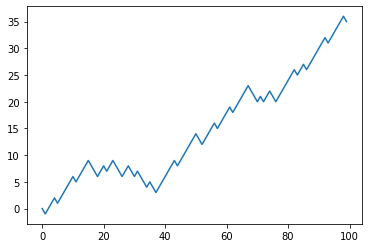

In [266]:
import random
from matplotlib import pyplot as plt

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

Você poderia perceber que *walk* é simplesmente a soma cumulativa
dos passos aleatórios, e poderia ser avaliada como uma expressão
de array. Assim, utilizarei o módulo *np.random* para sortear mil
jogadas de moeda de uma só vez, definirei essas jogadas com 1 e –
1 e calcularei a soma cumulativa:

In [159]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum()

A partir daí, podemos começar a extrair dados estatísticos, como o
valor mínimo e o valor máximo na trajetória do passeio:

In [160]:
walks.min()

-9

In [161]:
walks.max()

60

Uma estatística mais complicada é o *instante da primeira cruzada* (firstcrossing time) – o passo em que o passeio aleatório alcança um
determinado valor. Nesse caso, podemos querer saber quanto
tempo demorou para que o passeio aleatório chegasse pelo menos
a dez passos de distância da origem 0 em qualquer direção.
*np.abs(walk) >= 10* nos dá um array booleano indicando em que ponto
o passeio alcançou ou excedeu 10, mas queremos o índice do
*primeiro* 10 ou –10. O fato é que podemos calcular isso usando
*argmax* , que devolve o primeiro índice do valor máximo no array
booleano (True é o valor máximo):

In [162]:
(np.abs(walks) >= 10).argmax()

297

### Simulando vários passeios aleatórios de uma só vez

Se a sua meta é simular vários passeios aleatórios, por exemplo, 5
mil deles, pode gerar todos os passeios aleatórios com pequenas
modificações no código anterior. Se receberem uma tupla de 2, as
funções de *numpy.random* gerarão um array bidimensional de sorteios,
e podemos calcular a soma cumulativa nas linhas a fim de calcular
todos os 5 mil passeios aleatórios de uma só vez:

In [163]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

In [164]:
walks.max()

122

In [165]:
walks.min()

-128

Entre esses passeios, vamos calcular o tempo mínimo de cruzada
para 30 ou –30. É um pouco complicado, pois nem todos os 5 mil
alcançam 30. Podemos verificar isso usando o método *any*:

In [166]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [167]:
hits30.sum() #Numero que atinge 30 ou -30

3368

Podemos utilizar esse array booleano para selecionar as linhas de
*walks* que realmente cruzaram o nível absoluto 30 e chamar *argmax*
no eixo 1 para obter os instantes de cruzada:

In [168]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

509.99762470308787